# TM10007 Assignment template

In [ ]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [ ]:
# Data loading functions. Uncomment the one you want to use
from hn.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')



The number of samples: 113
The number of columns: 160


# Deleting missing data

In [ ]:
import pandas as pd
data_df = pd.DataFrame(data)

# Drop rows with any empty cells 
data_df.dropna(axis=0, how='any')

,hf_energy,hf_entropy,hf_kurtosis,hf_max,hf_mean,hf_median,hf_min,hf_peak,hf_quartile_range,hf_range,hf_skewness,hf_std,label,of_theta_x,of_theta_y,of_theta_z,sf_compactness_avg_2D,sf_compactness_std_2D,sf_convexity_avg_2D,sf_convexity_std_2D,sf_cvar_avg_2D,sf_cvar_std_2D,sf_evar_avg_2D,sf_evar_std_2D,sf_prax_avg_2D,sf_prax_std_2D,sf_rad_dist_avg_2D,sf_rad_dist_std_2D,sf_roughness_avg_2D,sf_roughness_std_2D,sf_solidity_avg_2D,sf_solidity_std_2D,sf_volume_2D,tf_GLRLM_GrayLevelNonUniformity,tf_GLRLM_GrayLevelNonUniformityNormalized,tf_GLRLM_GrayLevelVariance,tf_GLRLM_HighGrayLevelRunEmphasis,tf_GLRLM_LongRunEmphasis,tf_GLRLM_LongRunHighGrayLevelEmphasis,tf_GLRLM_LongRunLowGrayLevelEmphasis,...,tf_Gabor_0.5A0.79max,tf_Gabor_0.5A0.79mean,tf_Gabor_0.5A0.79min,tf_Gabor_0.5A0.79skew,tf_Gabor_0.5A0.79std,tf_Gabor_0.5A1.57kurt,tf_Gabor_0.5A1.57max,tf_Gabor_0.5A1.57mean,tf_Gabor_0.5A1.57min,tf_Gabor_0.5A1.57skew,tf_Gabor_0.5A1.57std,tf_Gabor_0.5A2.36kurt,tf_Gabor_0.5A2.36max,tf_Gabor_0.5A2.36mean,tf_Gabor_0.5A2.36min,tf_Gabor_0.5A2.36skew,tf_Gabor_0.5A2.36std,tf_LBP_kurtosis_R15_P36,tf_LBP_kurtosis_R3_P12,tf_LBP_kurtosis_R8_P24,tf_LBP_mean_R15_P36,tf_LBP_mean_R3_P12,tf_LBP_mean_R8_P24,tf_LBP_median_R15_P36,tf_LBP_median_R3_P12,tf_LBP_median_R8_P24,tf_LBP_peak_R15_P36,tf_LBP_peak_R3_P12,tf_LBP_peak_R8_P24,tf_LBP_skew_R15_P36,tf_LBP_skew_R3_P12,tf_LBP_skew_R8_P24,tf_LBP_std_R15_P36,tf_LBP_std_R3_P12,tf_LBP_std_R8_P24,tf_NGTDM_Busyness,tf_NGTDM_Coarseness,tf_NGTDM_Complexity,tf_NGTDM_Contrast,tf_NGTDM_Strength
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_HN1006_0,24345.357124,3.444203,30.940366,2.677051,2.548128,2.558302,2.385205,294,0.055232,0.291846,-4.035903,0.078266,T12,3.043388,0.221743,-2.102872,0.722578,0.148081,0.973378,0.035628,0.049121,0.053458,0.062045,0.053497,0.301014,0.209131,9.206237,1.986539,5.966302,1.634071,1.058219,0.074593,3713.607788,392.692308,1.000000,0.000000,1.000000,29.415630,29.415630,29.415630,...,-0.439754,1.750705,0.222996,0.974387,1.492299,4.845143,-0.578743,0.083445,-1.012089,5.246783,-0.921009,15.303719,7.016159,9.782484,15.807156,17.388117,5.115663,3.383438,-1.664327,-1.422301,32.742252,7.009070,17.139078,37.0,6.0,25.0,37.0,13.0,25.0,-2.306473,-0.013623,-0.740877,11.184061,5.280484,11.146737,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
0_HN1022_0,35301.370880,2.873434,26.545182,2.382068,2.155280,2.258897,0.662800,4862,0.130870,1.719268,-4.812992,0.378126,T12,-2.571212,0.739780,0.755899,0.626925,0.208959,0.878100,0.142944,0.054426,0.033432,0.051605,0.032516,0.342103,0.116161,16.740979,3.460630,12.340666,5.739564,1.091637,0.087981,31559.944153,1778.804391,0.898389,0.050806,3.838870,121.030138,483.287348,30.465835,...,-0.693688,0.901192,-1.705681,-1.250459,0.619993,12.522472,1.836954,0.974061,0.957290,12.954746,0.662468,23.404948,34.514467,19.485505,56.189569,28.666283,15.059293,2.989629,-1.451337,0.719410,32.345340,8.111898,20.419512,37.0,10.0,25.0,37.0,13.0,25.0,-2.218897,-0.449861,-1.600916,11.806938,5.127799,8.971347,12.490025,0.020387,0.008373,1.090935e-04,0.018735
0_HN1026_0,6340.950214,2.769541,36.348167,2.690379,2.280517,2.294630,1.672403,446,0.101971,1.017976,-4.156410,0.228803,T34,3.035682,0.873090,2.841478,0.789424,0.083515,0.968906,0.030291,0.036733,0.016885,0.046494,0.011236,0.591224,0.151555,9.077118,1.706271,6.432505,3.218103,1.061201,0.042725,3347.396851,301.185345,0.984408,0.007796,3.976376,42.004138,167.992926,10.506941,...,1.048287,0.624455,0.385063,-1.078336,1.551719,3.387883,-1.172792,2.059853,-1.082650,6.508924,1.325531,19.903960,11.640117,4.092339,20.207159,20.849978,6.032236,5.981020,-1.497055,2.325016,33.627602,8.145721,21.619121,37.0,10.0,25.0,37.0,13.0,25.0,-2.818756,-0.400584,-2.044795,10.398354,5.075791,7.978472,0.243968,1.027099,0.001501,3.528037e-06,0.672940
0_HN1029_0,5690.500179,3.073200,22.336711,2.396042,1.985643,2.053187,0.449525,891,0.103764,1.946517,-4.354334,0.374312,T12,-3.039988,0.845771,-1.819250,0.718820,0.050853,0.9

# Splitting training and test data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

label = data_df['label'].to_numpy()
features = data_df.drop(['label'], axis=1).to_numpy()
print(label)

# Rename labels: change T12 to 0 and T34 to 1
for elem, num in enumerate(label):
  if num == 'T12':
    label[elem] = 0
  elif num == 'T34':
    label[elem] = 1
label = np.array(label, dtype=int)



def split_data(label, features, fr_test=0.2):
  """ This function splits the data into train set and test set. """
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=fr_test)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(label, features)

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 1]
[0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 1]
[[7.24080405e+03 3.06758779e+00 3.08362961e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.69050018e+03 3.07319957e+00 2.23367108e+01 ... 1.22137979e-02
  1.91797654e-04 6.29398468e-02]
 [3.55529045e+04 2.27550633e+00 5.94223510e+01 ... 2.11689558e-04
  4.12426206e-08 1.19453907e+00]
 ...
 [2.15197730e+04 1.76660340e+00 8.88680951e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.78469375e+04 2.31647214e+00 2.12513426e+01 ... 8.79056679e-03
  1.08743988e-04 9.56332484e-03]
 [5.69579015e+03 3.94002398e+00 9.4498

23 23


# Trying out scaling on dataset
This is the most common scaling method. But there are other methods, such as the min-max scaling using the sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.RobustScaler. Try adapt the above example and look at the difference. When would you use min-max and when would you use standard scaling?

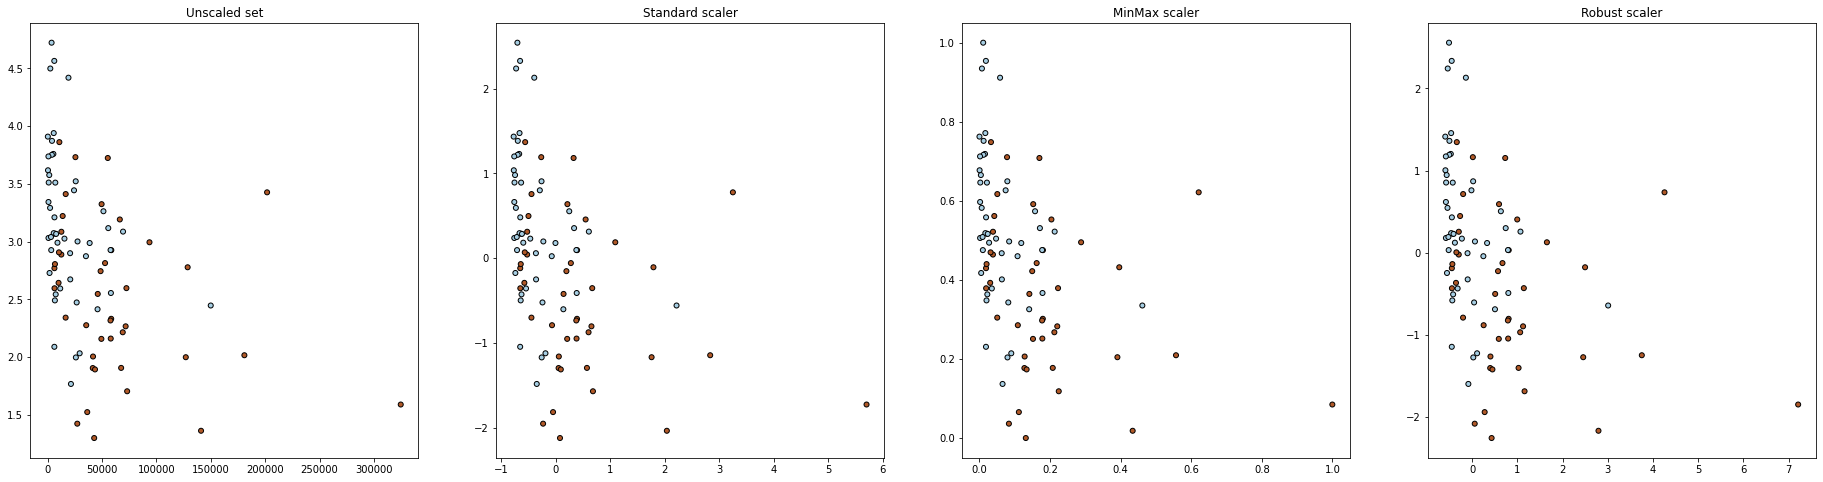

In [ ]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm

# Scale the dataset
scaler_SC = preprocessing.StandardScaler()
scaler_MM = preprocessing.MinMaxScaler()
scaler_RC = preprocessing.RobustScaler(quantile_range=(30.0, 70.0))

scaler_SC.fit(x_train)
scaler_MM.fit(x_train)
scaler_RC.fit(x_train)

x_train_SC = scaler_SC.transform(x_train)
x_train_MM = scaler_MM.transform(x_train)
x_train_RC = scaler_RC.transform(x_train)


# Plot scatterplot of two features for different scaling methods
fig = plt.figure(figsize=(32, 8))
ax = fig.add_subplot(1, 4, 1)
ax.set_title("Unscaled set")
ax.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train,
           s=25, edgecolor='k', cmap=plt.cm.Paired)
ax = fig.add_subplot(1, 4, 2)
ax.set_title("Standard scaler")
ax.scatter(x_train_SC[:, 0], x_train_SC[:, 1], marker='o', c=y_train,
           s=25, edgecolor='k', cmap=plt.cm.Paired)
ax = fig.add_subplot(1, 4, 3)
ax.set_title("MinMax scaler")
ax.scatter(x_train_MM[:, 0], x_train_MM[:, 1], marker='o', c=y_train,
           s=25, edgecolor='k', cmap=plt.cm.Paired)
ax = fig.add_subplot(1, 4, 4)
ax.set_title("Robust scaler")
ax.scatter(x_train_RC[:, 0], x_train_RC[:, 1], marker='o', c=y_train,
           s=25, edgecolor='k', cmap=plt.cm.Paired)





# Feature Selection

In [ ]:
# Feature selection/extraction
from sklearn import svm
from sklearn import feature_selection 
from sklearn import model_selection

# Create the RFE object and compute a cross-validated score.
svc = svm.SVC(kernel="linear")

rfecv = feature_selection.RFECV(
    estimator=svc, step=1, 
    cv=model_selection.StratifiedKFold(4),
    scoring='roc_auc')
rfecv.fit(x_train_SC, y_train)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Different classifiers

In [ ]:
# # General packages
# import numpy as np 
# import matplotlib.pyplot as plt
# from sklearn import datasets as ds
# from sklearn import metrics
 
# # Metrics
# #from sklearn.metrics import confusion_matrix
# #from sklearn.metrics import mean_absolute_error
# # from sklearn.metrics import r2_score

# # Classifiers
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.decomposition import PCA

# def colorplot(clf, ax, x, y, h=100, precomputer=None):
#     '''
#     Overlay the decision areas as colors in an axes.
    
#     Input:
#         clf: trained classifier
#         ax: axis to overlay color mesh on
#         x: feature on x-axis
#         y: feature on y-axis
#         h(optional): steps in the mesh
#     '''
#     # Create a meshgrid the size of the axis
#     xstep = (x.max() - x.min() ) / 20.0
#     ystep = (y.max() - y.min() ) / 20.0
#     x_min, x_max = x.min() - xstep, x.max() + xstep
#     y_min, y_max = y.min() - ystep, y.max() + ystep
#     h = max((x_max - x_min, y_max - y_min))/h
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     features = np.c_[xx.ravel(), yy.ravel()]
#     if precomputer is not None:
#         if type(precomputer) is RBFSampler:
#             features = precomputer.transform(features)
#         elif precomputer is rbf_kernel:
#             features = rbf_kernel(features, X)
            
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     if hasattr(clf, "decision_function"):
#         Z = clf.decision_function(features)
#     else:
#         Z = clf.predict_proba(features)
#     if len(Z.shape) > 1:
#         Z = Z[:, 1]
    
#     # Put the result into a color plot
#     cm = plt.cm.RdBu_r
#     Z = Z.reshape(xx.shape)
#     ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
#     del xx, yy, x_min, x_max, y_min, y_max, Z, cm



# #   - GaussianNB
# #   - LinearDiscriminantAnalysis
# #   - QuadraticDiscriminantAnalysis
# #   - LogisticRegression
# #   - SGDClassifier
# #   - KNeighborsClassifier
# #   Motivate your choice. You can use the example code below to loop over both
# #   the datasets and the classifiers at the same time:


# clsfs = [LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB(), 
#          LogisticRegression(),SGDClassifier(),KNeighborsClassifier()]

# # First make a plot without classifiers:
# fig = plt.figure(figsize=(21,7*len(clsfs)))
# num = 0  # Iteration number for the subplots
